In [1]:
# Dependencies
import json
import requests
from config import api_key
from config import hello
api_key = '8bbeec0c5f27738268b3d23f00127515'

In [2]:
# Save config information
city = "Kansas City"
# Build query URL
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={hello()}&units=imperial"
url

'http://api.openweathermap.org/data/2.5/weather?q=Kansas City&appid=8bbeec0c5f27738268b3d23f00127515&units=imperial'

In [3]:
# Get weather data
response = requests.get(url).json()
# Get the temperature from the response
temp = response['main']['temp']

In [4]:
temp

80.64

In [6]:
cities = ["topeka","kansas city","new york","fargo"]

In [10]:
temps = []
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={hello()}&units=imperial"
    response = requests.get(url).json()
    temp = response['main']['temp']
    temps.append({"city":city,"temp":temp})
    print(city,temp)

topeka 80.01
kansas city 80.11
new york 71.47
fargo 80.31


In [11]:
temps

[{'city': 'topeka', 'temp': 80.01},
 {'city': 'kansas city', 'temp': 80.11},
 {'city': 'new york', 'temp': 71.47},
 {'city': 'fargo', 'temp': 80.31}]

In [12]:
import pandas as pd

In [14]:
df =pd.DataFrame(temps)
df

,city,temp
0,topeka,80.01
1,kansas city,80.11
2,new york,71.47
3,fargo,80.31


In [16]:
df = df.set_index('city')

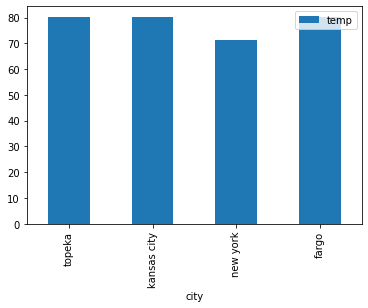

In [28]:
df.plot(kind="bar")

In [22]:
responses = []
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={hello()}&units=imperial"
    response = requests.get(url).json()
    responses.append(response)

In [23]:
responses

[{'coord': {'lon': -95.678, 'lat': 39.0483},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 80.01,
   'feels_like': 81.39,
   'temp_min': 77.86,
   'temp_max': 82.22,
   'pressure': 1015,
   'humidity': 56},
  'visibility': 10000,
  'wind': {'speed': 3.44, 'deg': 100},
  'clouds': {'all': 0},
  'dt': 1693268200,
  'sys': {'type': 2,
   'id': 2003274,
   'country': 'US',
   'sunrise': 1693223272,
   'sunset': 1693270835},
  'timezone': -18000,
  'id': 4280539,
  'name': 'Topeka',
  'cod': 200},
 {'coord': {'lon': -94.5786, 'lat': 39.0997},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 80.11,
   'feels_like': 81.73,
   'temp_min': 76.42,
   'temp_max': 83.25,
   'pressure': 1015,
   'humidity': 58},
  'visibility': 10000,
  'wind': {'speed': 3.44, 'deg': 330},
  'clouds': {'all': 0},
  'dt': 1693268197

In [26]:
pd.DataFrame(responses)

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod
0,"{'lon': -95.678, 'lat': 39.0483}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 80.01, 'feels_like': 81.39, 'temp_min...",10000,"{'speed': 3.44, 'deg': 100}",{'all': 0},1693268200,"{'type': 2, 'id': 2003274, 'country': 'US', 's...",-18000,4280539,Topeka,200
1,"{'lon': -94.5786, 'lat': 39.0997}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 80.11, 'feels_like': 81.73, 'temp_min...",10000,"{'speed': 3.44, 'deg': 330}",{'all': 0},1693268197,"{'type': 1, 'id': 4903, 'country': 'US', 'sunr...",-18000,4393217,Kansas City,200
2,"{'lon': -74.006, 'lat': 40.7143}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 71.47, 'feels_like': 71.94, 'temp_min...",10000,"{'speed': 10.36, 'deg': 150}",{'all': 100},1693268079,"{'type': 2, 'id': 2008101, 'country': 'US', 's...",-14400,5128581,New York,200
3,"{'lon': -96.7898, 'lat': 46.8772}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 80.31, 'feels_like': 81.28, 'temp_min...",10000,"{'speed': 6.91, 'deg': 30}",{'all': 20},1693268428,"{'type': 1, 'id': 4060, 'country': 'US', 'sunr...",-18000,5059163,Fargo,200
